<a href="https://colab.research.google.com/github/masleniamubarrat/ATM/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
!pip install scikit-image


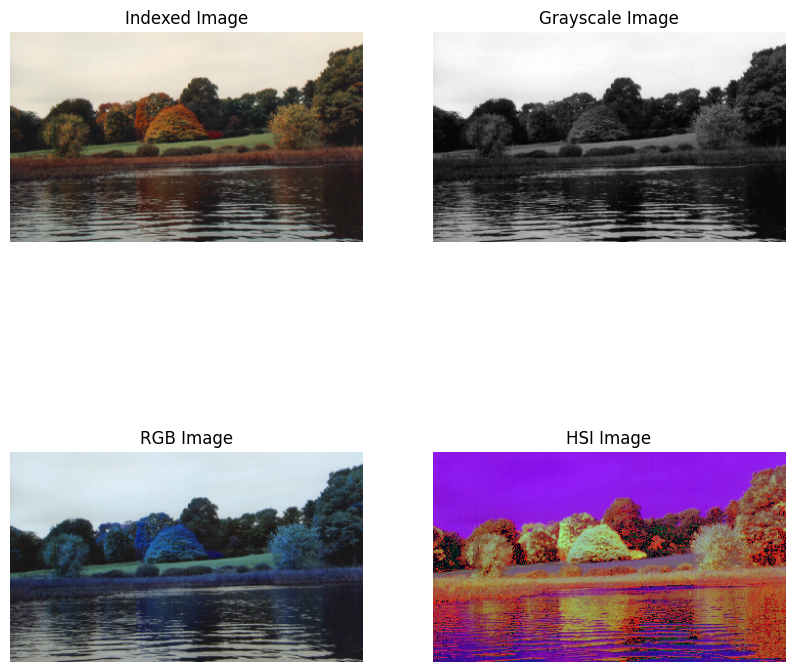

In [2]:
# Import necessary libraries
import cv2
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

# Load the indexed image (assuming "canoe.tif" is in your working directory or Google Drive)
# Replace the path with your own image path
img_indexed = io.imread('/content/autumn.tif')

# 1. Convert to Grayscale
img_gray = cv2.cvtColor(img_indexed, cv2.COLOR_BGR2GRAY)

# 2. Convert to RGB
img_rgb = cv2.cvtColor(img_indexed, cv2.COLOR_BGR2RGB)

# 3. Convert to HSI
# OpenCV doesn't directly support HSI, but we can use skimage's rgb2hsv (HSV is similar to HSI)
img_hsi = color.rgb2hsv(img_rgb)

# Plot and display all the images (indexed, grayscale, RGB, and HSI)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Indexed image
axs[0, 0].imshow(img_indexed)
axs[0, 0].set_title('Indexed Image')
axs[0, 0].axis('off')

# Grayscale image
axs[0, 1].imshow(img_gray, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

# RGB image
axs[1, 0].imshow(img_rgb)
axs[1, 0].set_title('RGB Image')
axs[1, 0].axis('off')

# HSI image
axs[1, 1].imshow(img_hsi)
axs[1, 1].set_title('HSI Image')
axs[1, 1].axis('off')

plt.show()


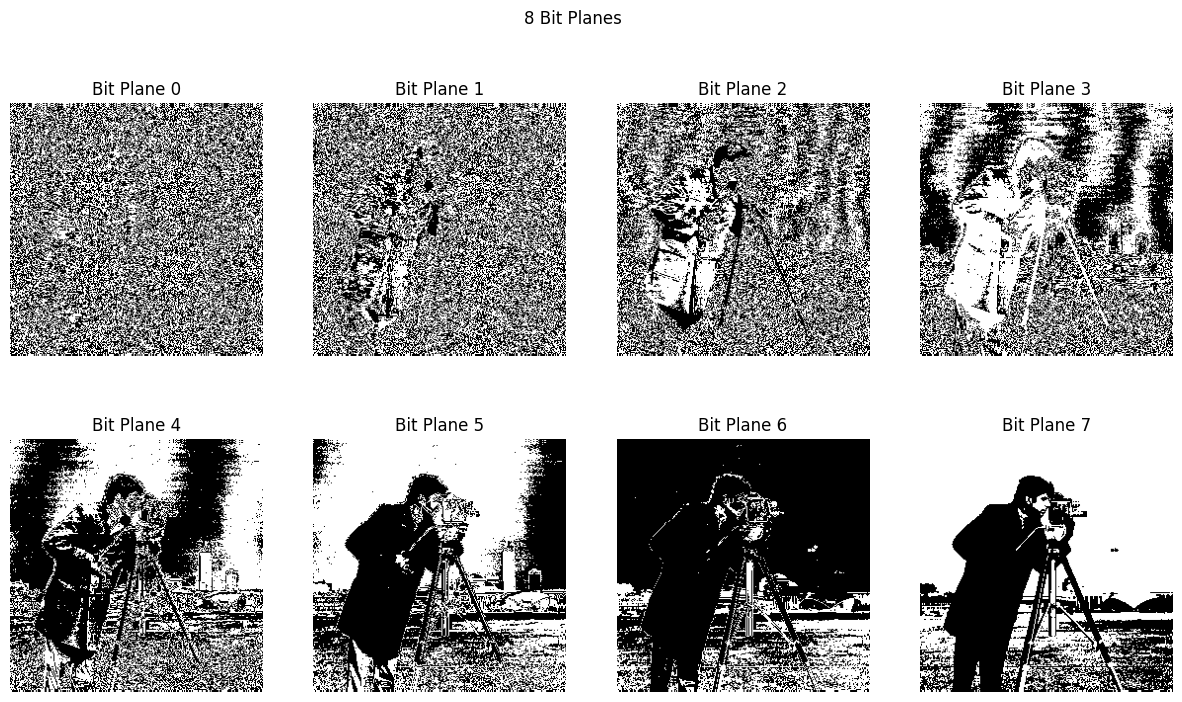

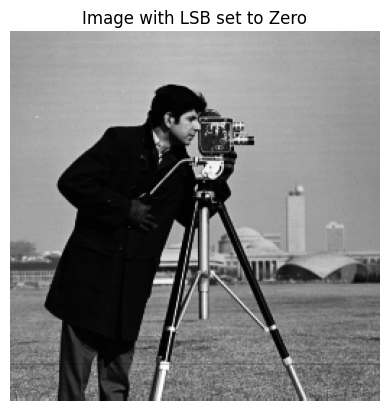

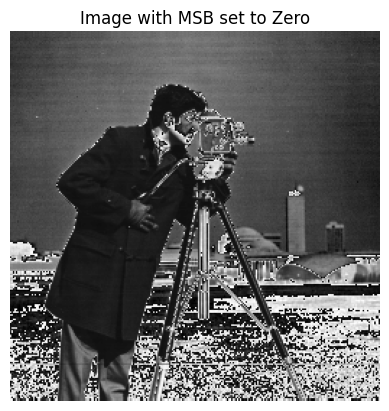

In [3]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the gray level image
img_gray = io.imread('/content/cameraman.tif')

# Function to extract bit planes
def bit_plane_extraction(img, bit):
    return np.bitwise_and(img, 1 << bit) >> bit

# Display the 8 bit planes
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('8 Bit Planes')

for i in range(8):
    bit_plane = bit_plane_extraction(img_gray, i)
    axs[i//4, i%4].imshow(bit_plane, cmap='gray')
    axs[i//4, i%4].set_title(f'Bit Plane {i}')
    axs[i//4, i%4].axis('off')

plt.show()

# Set the LSB (Least Significant Bit) to zero
img_lsb_zero = np.bitwise_and(img_gray, ~1)
plt.imshow(img_lsb_zero, cmap='gray')
plt.title('Image with LSB set to Zero')
plt.axis('off')
plt.show()

# Set the MSB (Most Significant Bit) to zero
img_msb_zero = np.bitwise_and(img_gray, ~(1 << 7))
plt.imshow(img_msb_zero, cmap='gray')
plt.title('Image with MSB set to Zero')
plt.axis('off')
plt.show()


## problem no 3

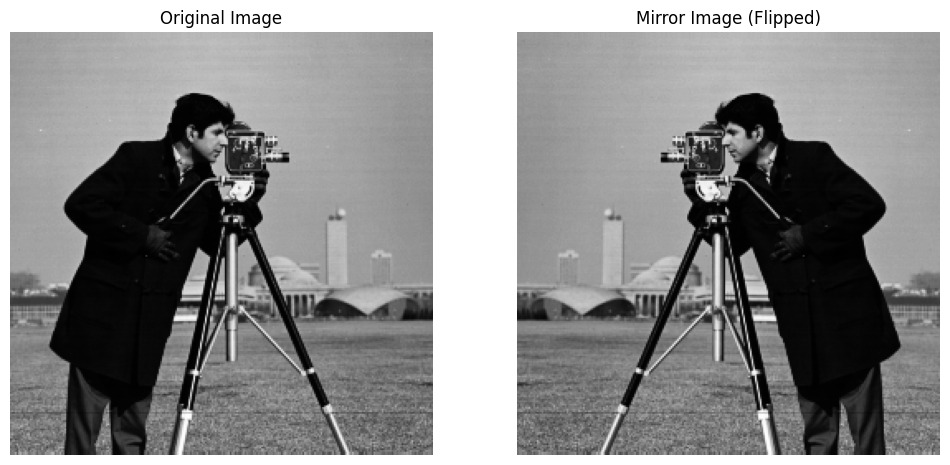

In [6]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from skimage import io

# Load the gray level image
img_gray = io.imread('/content/cameraman.tif')

# Flip the image horizontally to create a mirror image
img_flipped = cv2.flip(img_gray, 1)  # 1 means flipping around the y-axis (horizontal flip)

# Display the original and flipped images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Flipped image (mirror image)
axs[1].imshow(img_flipped, cmap='gray')
axs[1].set_title('Mirror Image (Flipped)')
axs[1].axis('off')

plt.show()


problem no 4

In [8]:
# Import necessary libraries
from skimage import io, exposure
import matplotlib.pyplot as plt

# Load the original and reference images (you can replace these with your own images)
original_image = io.imread('/content/cameraman.tif', as_gray=True)
reference_image = io.imread('/content/download.tif', as_gray=True)  # You can choose any other image as reference

# Apply histogram specification (matching)
matched_image = exposure.match_histograms(original_image, reference_image, multichannel=False)

# Display the original, reference, and matched images side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(original_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Reference image
axs[1].imshow(reference_image, cmap='gray')
axs[1].set_title('Reference Image')
axs[1].axis('off')

# Matched image (histogram specified)
axs[2].imshow(matched_image, cmap='gray')
axs[2].set_title('Matched Image (Histogram Specification)')
axs[2].axis('off')

plt.show()


TiffFileError: not a TIFF file b'\x89PNG'

problem no 5

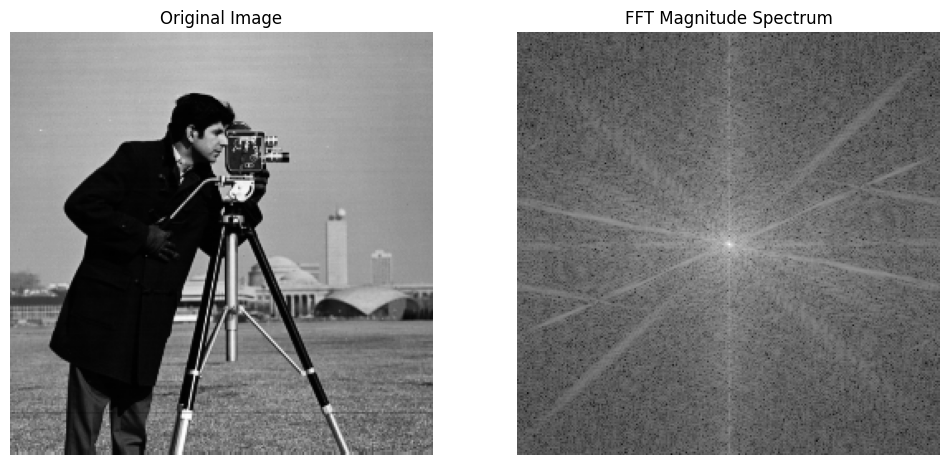

In [9]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

# Load the image
img = io.imread('/content/cameraman.tif', as_gray=True)

# Compute the 2D FFT of the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Shift the zero frequency component to the center

# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(fshift) + 1)  # Use log scale for better visualization

# Display the original image and its FFT magnitude spectrum
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# FFT magnitude spectrum
axs[1].imshow(magnitude_spectrum, cmap='gray')
axs[1].set_title('FFT Magnitude Spectrum')
axs[1].axis('off')

plt.show()


probelm no 6

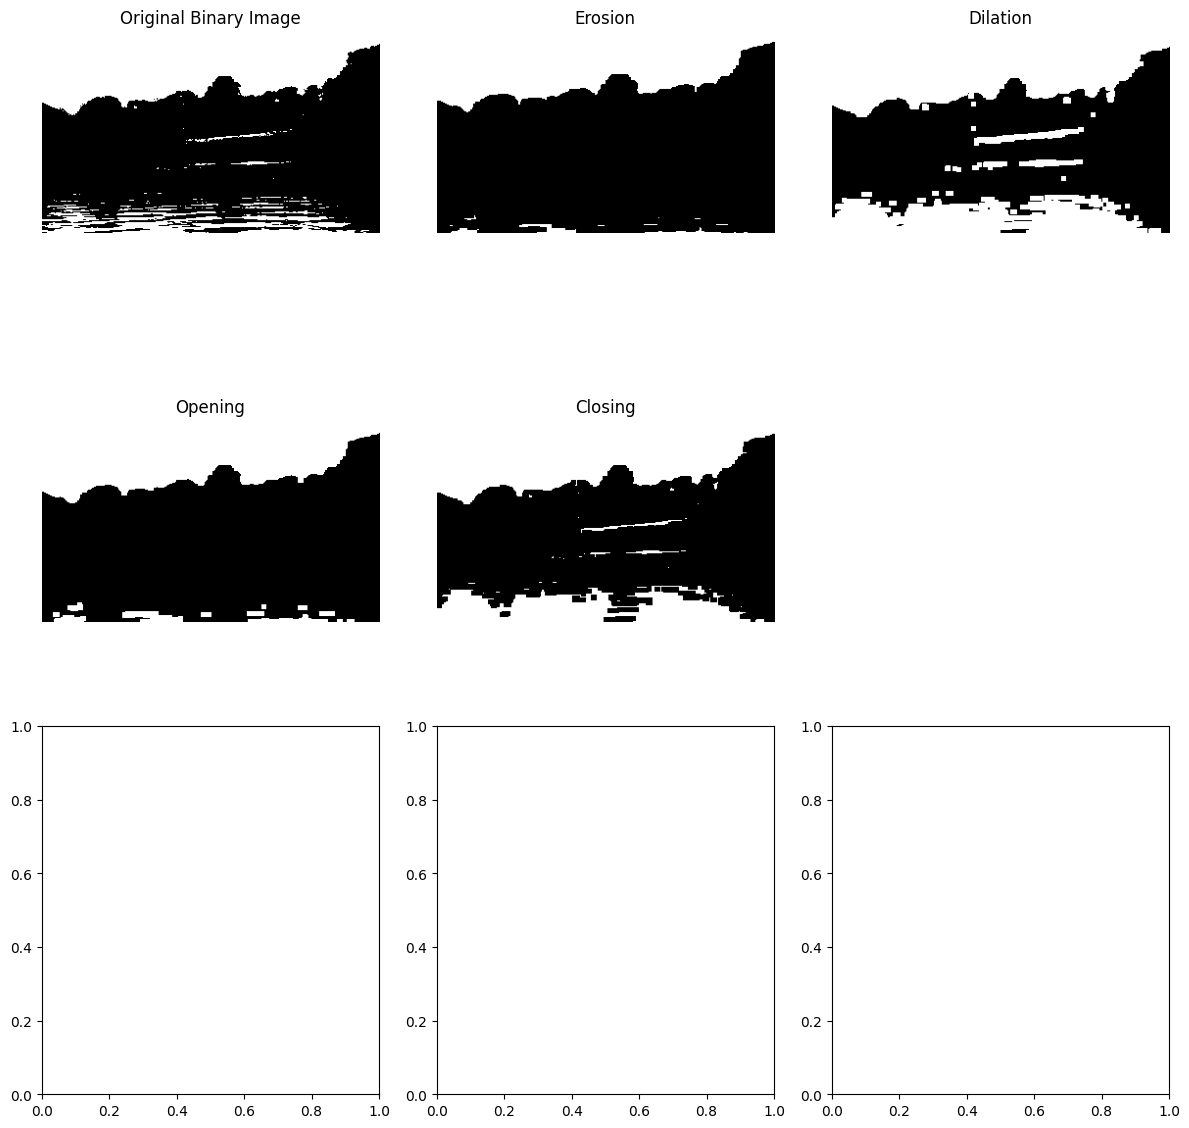

In [10]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image and convert it to grayscale
img = io.imread('/content/autumn.tif', as_gray=True)

# Convert to binary image using thresholding
_, binary_img = cv2.threshold((img * 255).astype(np.uint8), 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform morphological operations
erosion = cv2.erode(binary_img, kernel, iterations=1)
dilation = cv2.dilate(binary_img, kernel, iterations=1)
opening = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Original binary image
axs[0, 0].imshow(binary_img, cmap='gray')
axs[0, 0].set_title('Original Binary Image')
axs[0, 0].axis('off')

# Erosion
axs[0, 1].imshow(erosion, cmap='gray')
axs[0, 1].set_title('Erosion')
axs[0, 1].axis('off')

# Dilation
axs[0, 2].imshow(dilation, cmap='gray')
axs[0, 2].set_title('Dilation')
axs[0, 2].axis('off')

# Opening
axs[1, 0].imshow(opening, cmap='gray')
axs[1, 0].set_title('Opening')
axs[1, 0].axis('off')

# Closing
axs[1, 1].imshow(closing, cmap='gray')
axs[1, 1].set_title('Closing')
axs[1, 1].axis('off')

# Adjust layout
axs[1, 2].axis('off')  # Empty space
plt.tight_layout()
plt.show()
